● Each ad set is targeting a unique (anonymous) audience. Within each ad set are groups
of ads that get distributed on a cost-per-impression basis.


● Reach: how many unique people were reached (not to be confused with impressions)


● Frequency: how many times, on average, someone within the ad set audience was
reached during the duration of the campaign


● Amount Spend: dollars spent during duration of campaign


● Impressions: number of times the ad appeared in front of someone


● CTR (click-through rate): number of link clicks divided by number of ad impressions (not
reach)


● Post Shares: how many times users shared the ad to their friends


● Post Comments: how many times users wrote something in the ad’s comments section


● Post Reactions: how many times users “liked” or “disliked” the ad


● Website Leads: number of people who started to sign-up with Arcadia but did not
complete the registration process

# IMPORTS

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split


In [82]:
#import data and clean ad set column
#change the type of the ad set column from strings to integers.

fb_df = pd.read_csv('Analytics___Data_Science_Summer_Associate_Exercise_Data.csv')
fb_df['Ad Set Name'] = fb_df['Ad Set Name'].str.replace('Ad Set', '')
fb_df['Ad Set Name'] = fb_df['Ad Set Name'].astype(int)

# print(fb_df.shape)
# print(fb_df.isna().sum())

fb_df.head()

,Ad Set Name,Age,Gender,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,1,35-44,unknown,152,1.421053,3.12,216,14.444444,NaN,NaN,NaN,20.526316,NaN,NaN,1.0,NaN,5.0,NaN,NaN
1,1,35-44,female,6777,1.091486,101.53,7397,13.725835,21.0,4.834762,0.283899,14.981555,NaN,NaN,30.0,8.0,258.0,NaN,NaN
2,1,35-44,male,6041,1.191359,70.83,7197,9.841601,21.0,3.372857,0.291788,11.724880,NaN,5.0,50.0,18.0,283.0,NaN,14.166
3,1,25-34,unknown,314,1.000000,3.34,314,10.636943,1.0,3.340000,0.318471,10.636943,NaN,NaN,2.0,2.0,9.0,NaN,NaN
4,1,25-34,male,7184,1.092567,63.25,7849,8.058351,20.0,3.162500,0.254810,8.804287,NaN,2.0,36.0,28.0,218.0,NaN,31.625


In [84]:
fb_df.shape

(259, 19)

In [66]:
# fb_df['Website Registrations Completed']=fb_df['Website Registrations Completed'].dropna()

In [67]:
# fb_df['Website Registrations Completed'].isna().sum()

In [68]:
# fb_df.Gender.value_counts(normalize=True)

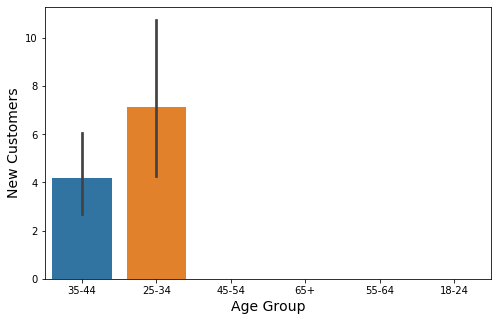

In [89]:
plt.figure(figsize=(8,5))
sns.barplot(fb_df.Age, fb_df['Website Registrations Completed'])
plt.ylabel('New Customers', fontsize=14)
plt.xlabel('Age Group', fontsize=14)

plt.show()

In [70]:
# fb_df['Ad Set Name'].value_counts()

In [71]:
# fb_df['Amount Spent (USD)'].sum()

# Grouped by Ad set name

In [72]:
grouped = fb_df.groupby('Ad Set Name')

grouped = pd.DataFrame(grouped.sum())


# grouped = grouped.sort_values('Ad Set Name', ascending=True)
# grouped['Cost per Registration'] = grouped['Amount Spent (USD)']/grouped['Website Registrations Completed']

grouped = grouped.reset_index()

grouped.head()

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,1,26469,6.922444,319.02,29730,68.095364,86.0,18.055771,1.489356,79.496844,0.0,10.0,146.0,60.0,991.0,0.000000,71.441000
1,2,16972,7.381687,477.69,20831,134.414313,156.0,12.532648,3.019334,164.796389,6.0,21.0,27.0,5.0,89.0,378.430000,115.307667
2,3,2775,6.027281,90.59,2795,183.976233,16.0,35.224722,2.053368,184.820614,0.0,2.0,6.0,2.0,2.0,0.000000,14.155000
3,4,43112,7.830940,1312.77,55490,185.855756,448.0,20.419163,4.318319,176.825278,24.0,77.0,58.0,10.0,156.0,253.449166,76.818298
4,5,26836,7.865254,670.06,30412,146.089718,153.0,25.671691,2.288864,165.102329,16.0,43.0,72.0,28.0,553.0,151.819167,77.232823


In [73]:
grouped['target'] = grouped['Cost per Website Registration Completed (USD)']/grouped['Website Registrations Completed']

    
grouped.head()

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD),target
0,1,26469,6.922444,319.02,29730,68.095364,86.0,18.055771,1.489356,79.496844,0.0,10.0,146.0,60.0,991.0,0.000000,71.441000,NaN
1,2,16972,7.381687,477.69,20831,134.414313,156.0,12.532648,3.019334,164.796389,6.0,21.0,27.0,5.0,89.0,378.430000,115.307667,63.071667
2,3,2775,6.027281,90.59,2795,183.976233,16.0,35.224722,2.053368,184.820614,0.0,2.0,6.0,2.0,2.0,0.000000,14.155000,NaN
3,4,43112,7.830940,1312.77,55490,185.855756,448.0,20.419163,4.318319,176.825278,24.0,77.0,58.0,10.0,156.0,253.449166,76.818298,10.560382
4,5,26836,7.865254,670.06,30412,146.089718,153.0,25.671691,2.288864,165.102329,16.0,43.0,72.0,28.0,553.0,151.819167,77.232823,9.488698


In [76]:
%store grouped

Stored 'grouped' (DataFrame)


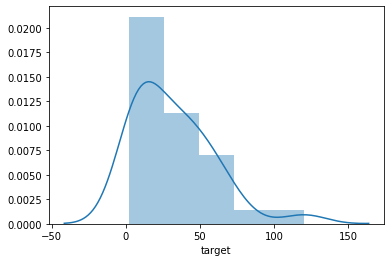

In [75]:
sns.distplot(grouped['target'])

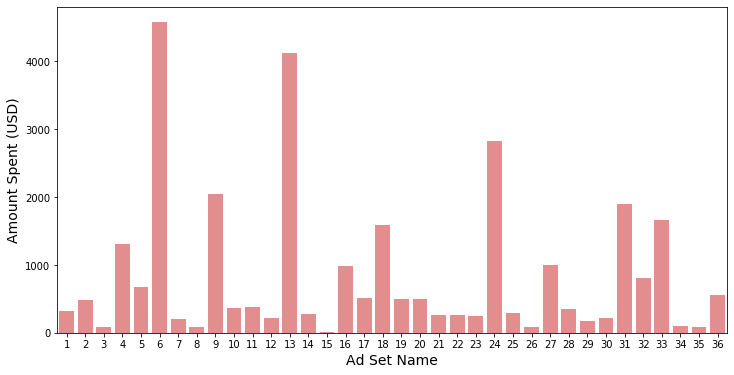

In [57]:
plt.figure(figsize=(12,6))
sns.barplot(grouped['Ad Set Name'], grouped['Amount Spent (USD)'].sort_values(ascending=False), color='lightcoral')
# plt.title('Amount spent by Ad set')
plt.ylabel('Amount Spent (USD)', fontsize=14)
plt.xlabel('Ad Set Name', fontsize=14)

plt.show()

In [1209]:
%store grouped


Stored 'grouped' (DataFrame)


In [1211]:
#comment - 6, 1, 49
#shares 6, 1, 31
#reactions 1, 5, 24
#leads = 13,6,33

In [1213]:
#Total Amount Spent

grouped['Amount Spent (USD)'].sum()

30071.42

In [1214]:
grouped.head(2)

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,36,17332,6.666229,554.19,18765,185.413652,165.0,25.195491,4.855476,205.633124,5.0,20.0,5.0,3.0,32.0,326.446667,137.132
1,35,2302,6.069965,87.48,2332,227.541597,9.0,49.965000,5.879032,230.373955,0.0,1.0,1.0,0.0,3.0,0.000000,13.250


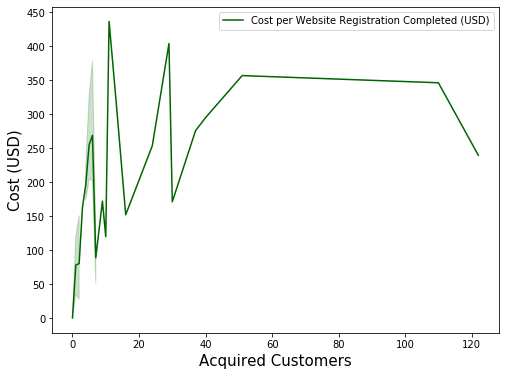

In [63]:
plt.figure(figsize=(8,6))

# sns.lineplot(grouped['Website Registrations Completed'], 
#              grouped['Cost per Website Lead (USD)'], color='r' , label='Cost per Website Lead')
sns.lineplot(grouped['Website Registrations Completed'], 
              grouped['Cost per Website Registration Completed (USD)'], color='darkgreen',
            label='Cost per Website Registration Completed (USD)')
# sns.lineplot(grouped['Website Registrations Completed'],
#     grouped['CPM (Cost per 1,000 Impressions) (USD)'], color='R', label='Cost per 1,000 impressions' )


plt.xlabel('Acquired Customers', fontsize=15)
plt.ylabel('Cost (USD)', fontsize=15)
plt.yticks(np.arange(0, 500, step=50))

plt.legend()
plt.show()

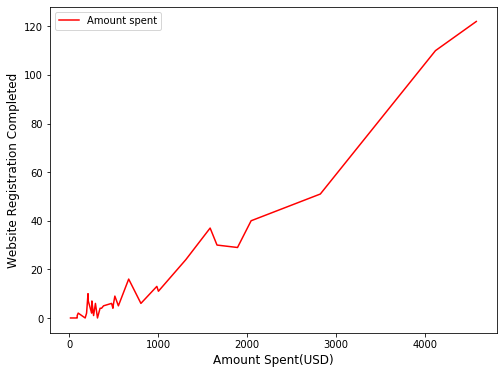

In [1216]:
plt.figure(figsize=(8,6))


sns.lineplot(grouped['Amount Spent (USD)'], grouped['Website Registrations Completed'], color='r', 
             label='Amount spent' )

plt.ylabel('Website Registration Completed', fontsize=12)
plt.xlabel('Amount Spent(USD)', fontsize=12)
# plt.xticks(np.arange(0, 3000, step=5000))

legend = plt.legend()


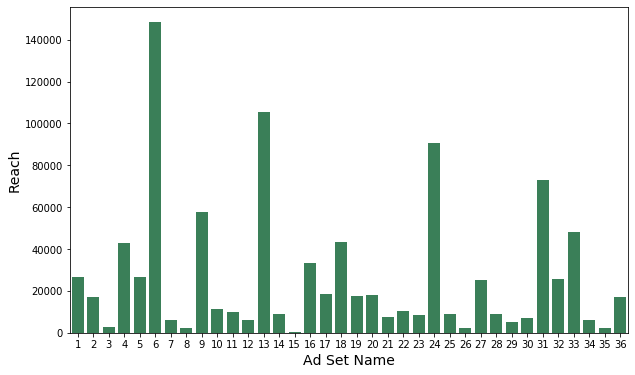

In [1217]:

plt.figure(figsize=(10,6))
sns.barplot(grouped['Ad Set Name'], grouped.Reach, color='seagreen')
plt.ylabel('Reach', fontsize=14)
plt.xlabel('Ad Set Name', fontsize=14)

plt.show()

# plt.title('Number of People Reached', fontsize=15)

Ad set 6 is the most reaching ad set reaching over 140,000 fb users
Ad set 13 comes second with a little over 1000,000 fb users
24, 31, 9, 33, 4, 18


ad set 15 did not reach anyone

# Frequencey

● Frequency: how many times, on average, someone within the ad set audience was
reached during the duration of the campaign

In [1218]:
grouped.Frequency.describe()

count    36.000000
mean      7.269918
std       1.858725
min       6.000000
25%       6.152735
50%       6.809453
75%       7.392876
max      15.004256
Name: Frequency, dtype: float64

In [1219]:
grouped.head()

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
0,36,17332,6.666229,554.19,18765,185.413652,165.0,25.195491,4.855476,205.633124,5.0,20.0,5.0,3.0,32.0,326.446667,137.132000
1,35,2302,6.069965,87.48,2332,227.541597,9.0,49.965000,5.879032,230.373955,0.0,1.0,1.0,0.0,3.0,0.000000,13.250000
2,34,6064,6.523927,102.45,6147,93.794974,13.0,32.256500,0.856617,100.304384,2.0,5.0,10.0,6.0,89.0,62.170000,56.695000
3,33,48128,7.134516,1663.40,56956,296.235306,1115.0,13.479817,9.027207,222.367411,30.0,261.0,12.0,20.0,53.0,170.884509,61.896798
4,32,25560,6.790768,807.54,27624,228.307528,298.0,20.310040,5.899207,212.658865,6.0,43.0,19.0,7.0,40.0,202.403333,101.161333


In [1220]:
grouped.Frequency.describe(
)

count    36.000000
mean      7.269918
std       1.858725
min       6.000000
25%       6.152735
50%       6.809453
75%       7.392876
max      15.004256
Name: Frequency, dtype: float64

Text(0.5, 0, 'Website Registrations Completed')

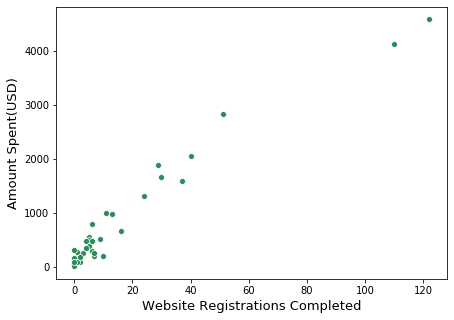

In [1221]:
plt.figure(figsize=(7,5))

sns.scatterplot(grouped['Website Registrations Completed'],grouped['Amount Spent (USD)'], color='seagreen', 
             )

plt.ylabel('Amount Spent(USD)', fontsize=13)
plt.xlabel('Website Registrations Completed', fontsize=13)


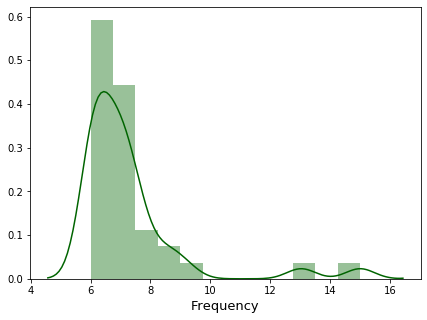

In [1222]:
plt.figure(figsize=(7,5))

sns.distplot(grouped['Frequency'], color='darkgreen' 
             )

# plt.ylabel('Amount Spent(USD)', fontsize=13)
plt.xlabel('Frequency', fontsize=13)
#plt.title('Registrations by Sets of Ads', fontsize=16)
plt.show()

# Amount Spent During Campaign 

● Amount Spend: dollars spent during duration of campaign


In [1224]:
grouped['Amount Spent (USD)'].describe()

count      36.000000
mean      835.317222
std      1082.801694
min        15.590000
25%       214.720000
50%       376.175000
75%       991.107500
max      4579.480000
Name: Amount Spent (USD), dtype: float64

# Imperessions

Impressions: number of times the ad appeared in front of someone

In [1225]:
grouped.Impressions.describe()

count        36.000000
mean      31347.166667
std       42799.301376
min         406.000000
25%        6694.750000
50%       15435.500000
75%       32354.500000
max      207604.000000
Name: Impressions, dtype: float64

Text(0, 0.5, 'Impressions')

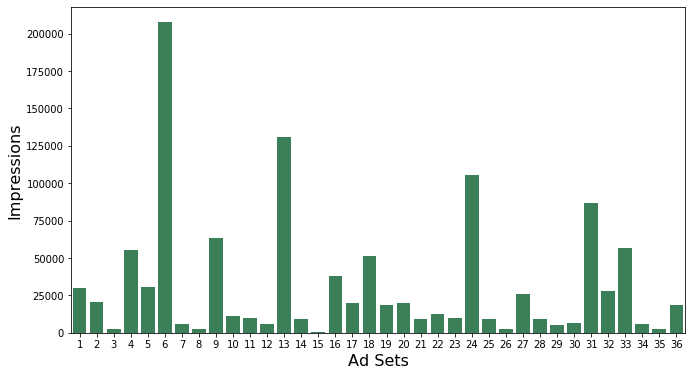

In [1226]:
plt.figure(figsize=(11, 6))

sns.barplot(grouped['Ad Set Name'], grouped.Impressions.sort_values(ascending=True),  color='seagreen')

# plt.title('Impressions number')
plt.xlabel('Ad Sets', fontsize=16)
plt.ylabel('Impressions', fontsize=16)

# CTR (Link Click-Through Rate)

In [1227]:
grouped['CTR (Link Click-Through Rate)'].describe()

count    36.000000
mean      5.290305
std       2.530582
min       0.694444
25%       3.059800
50%       5.447967
75%       7.215500
max       9.626291
Name: CTR (Link Click-Through Rate), dtype: float64

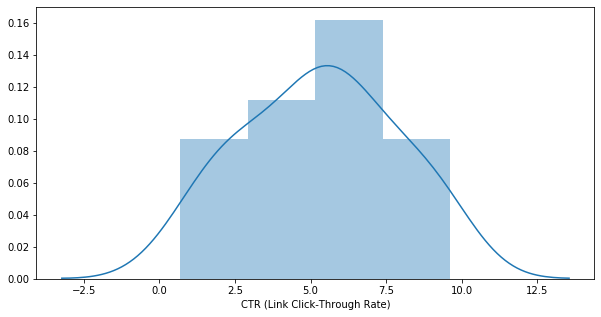

In [1228]:
plt.figure(figsize=(10, 5))

#sns.barplot(grouped['Ad Set Name'], grouped['CTR (Link Click-Through Rate)'], color='seagreen')

sns.distplot(grouped['CTR (Link Click-Through Rate)'])
# number of link clicks divided by number of ad impressions (not reach)

In [1256]:
# grouped.sort_values('Post Shares', ascending=False)

# Post Shares

In [1230]:
grouped['Post Shares'].describe()

count     36.000000
mean      30.527778
std       52.941200
min        0.000000
25%        2.000000
50%        7.000000
75%       28.500000
max      248.000000
Name: Post Shares, dtype: float64

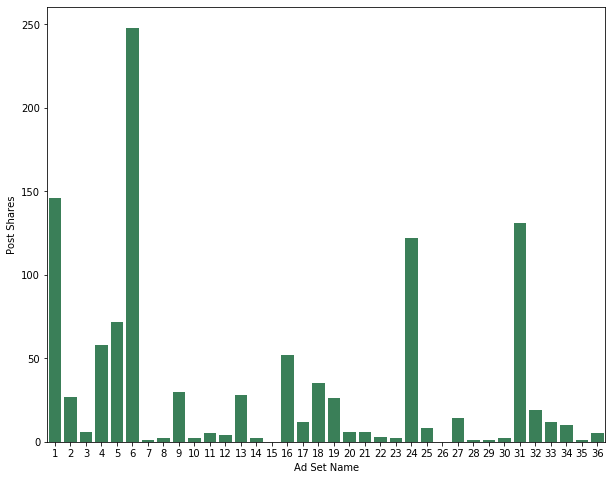

In [1231]:
plt.figure(figsize=(10,8))
sns.barplot(grouped['Ad Set Name'], grouped['Post Shares'], color='seagreen')

#6, 1,31, 24,

# Post Comments

In [1232]:
grouped['Post Comments'].describe()

count    36.000000
mean     11.055556
std      17.234425
min       0.000000
25%       0.000000
50%       2.500000
75%      12.750000
max      64.000000
Name: Post Comments, dtype: float64

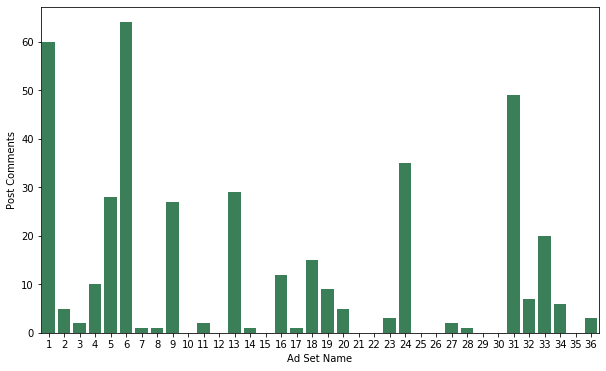

In [1233]:
plt.figure(figsize=(10,6))
sns.barplot(grouped['Ad Set Name'], grouped['Post Comments'], color='seagreen')



# Most interactable ads

In [1234]:
grouped = grouped.sort_values('Ad Set Name', ascending=True)

In [1235]:
grouped['Ad Set Name'] = grouped['Ad Set Name'].astype(int)

grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 35 to 0
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Ad Set Name                                    36 non-null     int64  
 1   Reach                                          36 non-null     int64  
 2   Frequency                                      36 non-null     float64
 3   Amount Spent (USD)                             36 non-null     float64
 4   Impressions                                    36 non-null     int64  
 5   CPM (Cost per 1,000 Impressions) (USD)         36 non-null     float64
 6   Link Clicks                                    36 non-null     float64
 7   CPC (Cost per Link Click) (USD)                36 non-null     float64
 8   CTR (Link Click-Through Rate)                  36 non-null     float64
 9   Cost per 1,000 People Reached (USD)            36 non-nu

In [1236]:
grouped.head(1)

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
35,1,26469,6.922444,319.02,29730,68.095364,86.0,18.055771,1.489356,79.496844,0.0,10.0,146.0,60.0,991.0,0.0,71.441


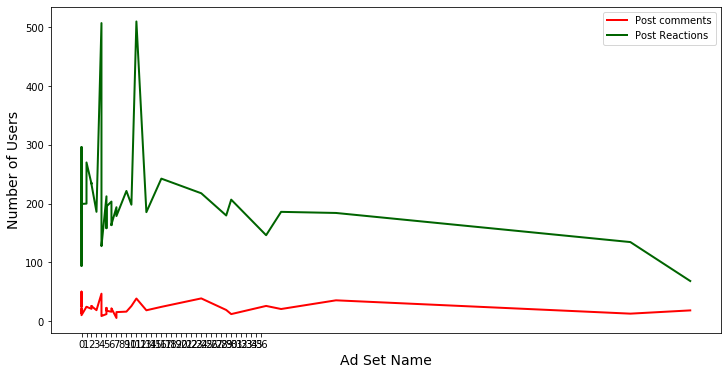

In [1237]:
# multiple line plot
plt.figure(figsize=(12,6))
x= grouped['Website Registrations Completed'].sort_values(ascending=False)
y1= grouped['CPC (Cost per Link Click) (USD)']
y2= grouped['CPM (Cost per 1,000 Impressions) (USD)']
# y3= grouped['Post Shares']

plt.plot( x, y1,  color='r', linewidth=2, label='Post comments')
plt.plot( x, y2,   color='darkgreen', linewidth=2, label = 'Post Reactions')
# plt.plot( x, y3,  color='c', linewidth=2, label="Post Shares")

plt.xlabel('Ad Set Name', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(np.arange(0,37,1))

plt.legend()

plt.show()

# Website Registrations Completed

In [1254]:
# grouped['Website Registrations Completed'].value_counts()

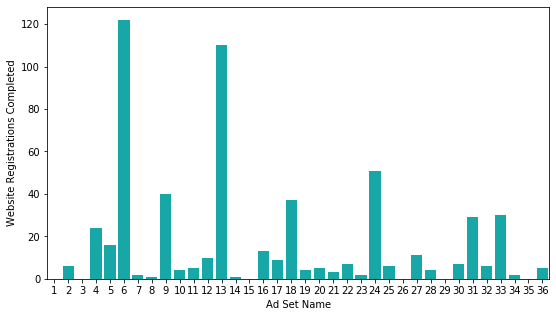

In [1255]:
plt.figure(figsize=(9,5))
sns.barplot( grouped['Ad Set Name'], grouped['Website Registrations Completed'], color='c')
# plt.title('Registrations by Sets of Ads', fontsize=16)


# Post Shares

In [1241]:
grouped['Post Shares'].describe()

count     36.000000
mean      30.527778
std       52.941200
min        0.000000
25%        2.000000
50%        7.000000
75%       28.500000
max      248.000000
Name: Post Shares, dtype: float64

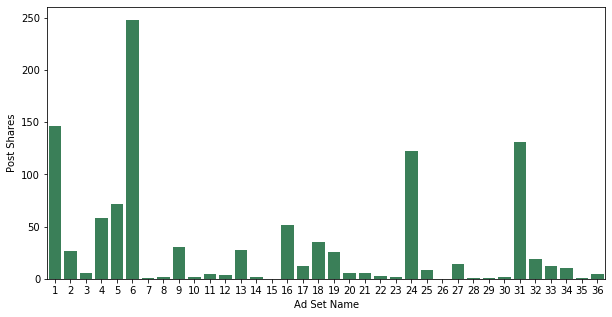

In [1242]:
plt.figure(figsize=(10,5))
sns.barplot(grouped['Ad Set Name'], grouped['Post Shares'], color='seagreen')

In [1243]:
grouped.head(2)

,Ad Set Name,Reach,Frequency,Amount Spent (USD),Impressions,"CPM (Cost per 1,000 Impressions) (USD)",Link Clicks,CPC (Cost per Link Click) (USD),CTR (Link Click-Through Rate),"Cost per 1,000 People Reached (USD)",Website Registrations Completed,Website Leads,Post Shares,Post Comments,Post Reactions,Cost per Website Registration Completed (USD),Cost per Website Lead (USD)
35,1,26469,6.922444,319.02,29730,68.095364,86.0,18.055771,1.489356,79.496844,0.0,10.0,146.0,60.0,991.0,0.00,71.441000
34,2,16972,7.381687,477.69,20831,134.414313,156.0,12.532648,3.019334,164.796389,6.0,21.0,27.0,5.0,89.0,378.43,115.307667


# Post Reactions: how many times users “liked” or “disliked” the ad

In [1244]:
grouped['Post Reactions'].describe()

count     36.000000
mean     114.500000
std      211.200717
min        0.000000
25%        6.000000
50%       23.500000
75%      122.500000
max      991.000000
Name: Post Reactions, dtype: float64

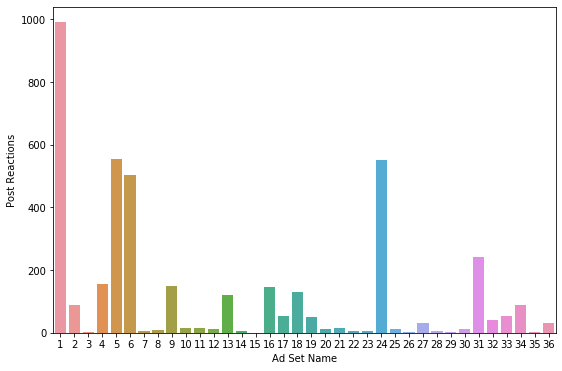

In [1249]:
plt.figure(figsize=(9,6))
sns.barplot(grouped['Ad Set Name'], grouped['Post Reactions'])

# Website Leads: number of people who started to sign-up but did not complete the registration process


In [1250]:
grouped['Website Leads'].describe()

count     36.000000
mean      56.833333
std       92.443187
min        0.000000
25%       11.000000
50%       20.500000
75%       43.750000
max      422.000000
Name: Website Leads, dtype: float64